<a href="https://colab.research.google.com/github/novelworm777/bangkit-kaidah-machine-learning/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# only run this in google colab to upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving jdih_kemenkeu_regulations.csv to jdih_kemenkeu_regulations.csv
User uploaded file "jdih_kemenkeu_regulations.csv" with length 1537224 bytes


In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import text_cleaning
import random

In [2]:
# warning disable
pd.options.mode.chained_assignment = None

# Load Data

In [3]:
directory = './data/'

In [4]:
# load raw data
raw_data_df = pd.read_csv(os.path.join(directory, 'jdih_kemenkeu_regulations.csv'))
print("Shape:", raw_data_df.shape)
raw_data_df.head()

Shape: (9176, 2)


,title,label
0,Jenis dan Tarif atas Jenis Penerimaan Negara B...,"Jenis Dan Tarif, Penerimaan Negara Bukan Pajak..."
1,"Tata Cara Pendaftaran, Pelaporan, dan Pendataa...","Pajak Bumi Dan Bangunan, Pendaftaran Dan Pelap..."
2,Pedoman Standar Pelayanan di Lingkungan Kement...,"Pedoman, Standar Pelayanan, Kementerian Keuangan"
3,Account Representative pada Kantor Pelayanan P...,"Account Representative, Kantor Pelayanan Pajak"
4,Perubahan Kedua atas Peraturan Menteri Keuanga...,"Perubahan Kedua, Program Pen, Pemerintah Daerah"


# Preprocessing

## Missing Values

In [5]:
# check na rows
num_null = raw_data_df.isna().sum()
print("Number of NA rows:\n", num_null)

Number of NA rows:
 title    6
label    0
dtype: int64


In [6]:
# let's only take the rows where title is not na
filtered_df = raw_data_df[raw_data_df['title'].notna()]
filtered_df.reset_index(drop=True, inplace=True)
print("Shape:", filtered_df.shape)

Shape: (9170, 2)


## Data Wrangling

In [7]:
# the labels will need to be changed into columns
# count the number of labels in each row
filtered_df['label_count'] = filtered_df['label'].apply(lambda x: len(str(x).split(', ')))
print("Labels distribution per doc:\n", filtered_df.label_count.value_counts(sort=False))

Labels distribution per doc:
 1     371
2    1783
3    6745
4     235
5      32
6       4
Name: label_count, dtype: int64


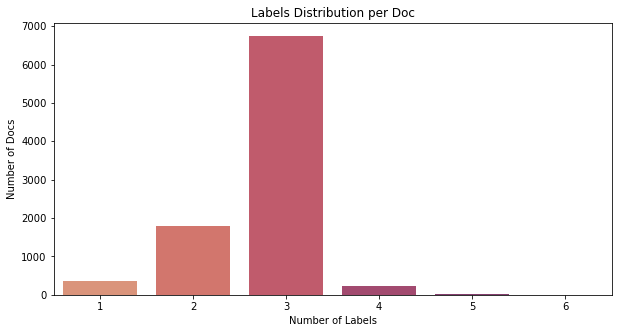

In [8]:
# visualize the labels distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=filtered_df.label_count, palette='flare')
plt.title("Labels Distribution per Doc")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Docs")
plt.show()

In [9]:
# let's get the unique labels
# split the labels of each row into separate columns
max_value = filtered_df['label_count'].max()
columns = ['label_' + str(x) for x in range(1, max_value+1)]
label_df = pd.DataFrame(filtered_df['label'].apply(lambda x: str(x).split(', ')).to_list(), columns=columns)
label_df.head()

,label_1,label_2,label_3,label_4,label_5,label_6
0,Jenis Dan Tarif,Penerimaan Negara Bukan Pajak,Kementerian Hukum Dan Ham,None,None,None
1,Pajak Bumi Dan Bangunan,Pendaftaran Dan Pelaporan,Objek Pajak Bumi,None,None,None
2,Pedoman,Standar Pelayanan,Kementerian Keuangan,None,None,None
3,Account Representative,Kantor Pelayanan Pajak,None,None,None,None
4,Perubahan Kedua,Program Pen,Pemerintah Daerah,None,None,None


In [10]:
# combine all columns into one and only leave the unique labels
combined_label_df = label_df.stack().reset_index()[[0]]
labels = combined_label_df[0].unique()
print("Number of unique labels:", len(labels))

Number of unique labels: 4632


In [11]:
# make the unique labels into new columns and replace all missing values into 0
new_label_df = pd.concat([label_df, pd.DataFrame(columns=list(labels))])
new_label_df.fillna(0, inplace=True)
new_label_df.head()

,label_1,label_2,label_3,label_4,label_5,label_6,Jenis Dan Tarif,Penerimaan Negara Bukan Pajak,Kementerian Hukum Dan Ham,Pajak Bumi Dan Bangunan,...,Pegawai Yang Tewas,Pemberian Uang Duka,Janda/Ahli Waris,Wajib Militer,Perpanjangan Dinas,Kepangkatan Militer/Polisi,Hak Kepegawaian,Besarnya Iuran,Tata Cara Penjualan,Syarat-Syarat
0,Jenis Dan Tarif,Penerimaan Negara Bukan Pajak,Kementerian Hukum Dan Ham,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pajak Bumi Dan Bangunan,Pendaftaran Dan Pelaporan,Objek Pajak Bumi,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pedoman,Standar Pelayanan,Kementerian Keuangan,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Account Representative,Kantor Pelayanan Pajak,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Perubahan Kedua,Program Pen,Pemerintah Daerah,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# fill the label columns with 1 if the label exist for that row
for column in columns:
    for index, label in enumerate(new_label_df[column]):
        if label != 0:
            new_label_df.loc[index, label] = 1
new_label_df.head()

,label_1,label_2,label_3,label_4,label_5,label_6,Jenis Dan Tarif,Penerimaan Negara Bukan Pajak,Kementerian Hukum Dan Ham,Pajak Bumi Dan Bangunan,...,Pegawai Yang Tewas,Pemberian Uang Duka,Janda/Ahli Waris,Wajib Militer,Perpanjangan Dinas,Kepangkatan Militer/Polisi,Hak Kepegawaian,Besarnya Iuran,Tata Cara Penjualan,Syarat-Syarat
0,Jenis Dan Tarif,Penerimaan Negara Bukan Pajak,Kementerian Hukum Dan Ham,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Pajak Bumi Dan Bangunan,Pendaftaran Dan Pelaporan,Objek Pajak Bumi,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Pedoman,Standar Pelayanan,Kementerian Keuangan,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Account Representative,Kantor Pelayanan Pajak,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Perubahan Kedua,Program Pen,Pemerintah Daerah,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# combine the label columns as labels of the dataset
dataset_df = pd.concat([filtered_df['title'], new_label_df.loc[:, labels[0]:]], axis=1)
dataset_df[labels] = dataset_df[labels].apply(lambda x: x.astype('int'))
dataset_df.head()

,title,Jenis Dan Tarif,Penerimaan Negara Bukan Pajak,Kementerian Hukum Dan Ham,Pajak Bumi Dan Bangunan,Pendaftaran Dan Pelaporan,Objek Pajak Bumi,Pedoman,Standar Pelayanan,Kementerian Keuangan,...,Pegawai Yang Tewas,Pemberian Uang Duka,Janda/Ahli Waris,Wajib Militer,Perpanjangan Dinas,Kepangkatan Militer/Polisi,Hak Kepegawaian,Besarnya Iuran,Tata Cara Penjualan,Syarat-Syarat
0,Jenis dan Tarif atas Jenis Penerimaan Negara B...,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Tata Cara Pendaftaran, Pelaporan, dan Pendataa...",0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pedoman Standar Pelayanan di Lingkungan Kement...,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Account Representative pada Kantor Pelayanan P...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Perubahan Kedua atas Peraturan Menteri Keuanga...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Duplicated Rows

In [14]:
# check rows duplicated by title
num_title_duplicated = dataset_df[dataset_df.duplicated(['title'])].shape[0]
print("Number of rows with duplicated title:", num_title_duplicated)

# check rows duplicated by title and labels
num_title_labels_duplicated = dataset_df[dataset_df.duplicated(dataset_df.columns)].shape[0]
print("Number of rows with duplicated title and having the same labels", num_title_labels_duplicated)

Number of rows with duplicated title: 554
Number of rows with duplicated title and having the same labels 372


In [15]:
# there are difference between the two numbers
# which means, there are rows with duplicated title, but different labels
def count_label_occur(df):
    label_count = pd.DataFrame()
    label_count['label'] = df.columns[1:]
    label_count['count'] = df.iloc[:, 1:].sum().values
    label_count.reset_index(inplace=True, drop=True)
    return label_count

# count the number of each label appear
label_occur_df = count_label_occur(dataset_df)
label_occur_df.describe()

,count
count,4632.000000
mean,5.459197
std,20.994525
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,792.000000


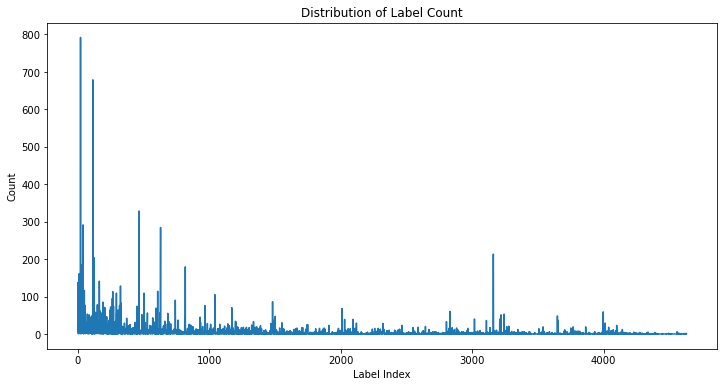

In [16]:
# visualize the occurance of labels
plt.figure(figsize=(12, 6))
plt.plot(label_occur_df['count'].values)
plt.title("Distribution of Label Count")
plt.xlabel("Label Index")
plt.ylabel("Count")
plt.show()

In [17]:
# many labels don't have enough data points
# which can make prediction less precise
# let's prioritize dropping the rows with label count less
label_occur_df.sort_values(['count'], inplace=True, ascending=False)
column_prioritize = label_occur_df['label'].values[:50]
dropped_df = dataset_df.sort_values(list(column_prioritize), ascending=True)
dropped_df.drop_duplicates(inplace=True)
print("Shape:", dropped_df.shape)

Shape: (8798, 4633)


In [18]:
# count the number of each label appear
label_occur_df = count_label_occur(dropped_df)
label_occur_df.describe()

,count
count,4632.000000
mean,5.248705
std,20.266799
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,788.000000


## Clustering Labels

In [19]:
# let's cut the number of labels down with threshold
threshold = 50
main_label_df = pd.DataFrame()
main_label_df = label_occur_df[label_occur_df['count']>threshold]
main_labels = main_label_df['label'].values
print("Number of labels above threshold:", len(main_labels))

# the labels below threshold will be clustered to a new label
new_label = 'Lain-lain'
main_labels = np.append(main_labels, new_label)

Number of labels above threshold: 60


In [20]:
# move the labels below threshold count to the new label
clustered_df = dropped_df.copy()
clustered_df[new_label] = 0
not_label = []
for column in clustered_df.columns[1:]:
    if column not in main_labels:
        clustered_df[new_label][clustered_df[column]==1] = 1
        not_label.append(column)

# drop the columns of labels below threshold
clustered_df.drop(not_label, axis=1, inplace=True)
print("Shape:", clustered_df.shape)

Shape: (8798, 62)


In [21]:
# count the number of each label appear
label_occur_df = count_label_occur(clustered_df)
label_occur_df.describe()

,count
count,61.000000
mean,255.131148
std,1064.934184
min,51.000000
25%,60.000000
50%,77.000000
75%,115.000000
max,8379.000000


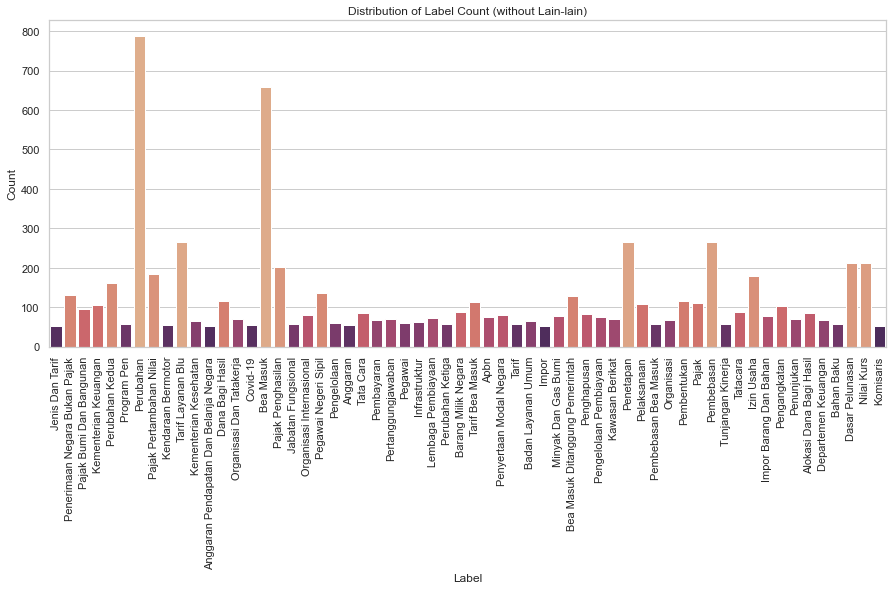

In [22]:
# visualize the distribution of label count
plt.figure(figsize=(15, 6))
sns.set(font_scale = 1)
sns.set_style('whitegrid') 
pal = sns.color_palette('flare', len(label_occur_df)-1)
rank = label_occur_df['count'][:-1].argsort().argsort()  
sns.barplot(x=label_occur_df['label'][:-1], y=label_occur_df['count'][:-1], palette=np.array(pal[::-1])[rank])
plt.title("Distribution of Label Count (without Lain-lain)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation='vertical')
plt.show()

## Merge Labels

In [23]:
# Tatacara and Tata Cara mean the same
# let's copy the value of Tatacara to Tata Cara
merged_df = clustered_df.copy()
tatacara_true = merged_df.loc[merged_df['Tatacara'] == 1]
for index in tatacara_true.index:
    merged_df.loc[index, 'Tata Cara'] = 1

# then drop the Tatacara column
merged_df.drop(['Tatacara'], axis=1, inplace=True)
print("Shape:", merged_df.shape)

Shape: (8798, 61)


## Drop Unecessary Columns

In [24]:
# Unecessary columns: Perubahan, Penghapusan, Penetapan, Pembebasan, Pembentukan, Pengangkatan
cut_df = merged_df.copy()
columns_dropped = ['Perubahan', 'Penghapusan', 'Penetapan', 'Pembebasan', 'Pembentukan', 'Pengangkatan']
cut_df.drop(columns_dropped, axis=1, inplace=True)
print("Shape:", cut_df.shape)

Shape: (8798, 55)


## Mising Values (Again)

In [25]:
# after so many times dropping columns
# let's check whether there's any document that have no label
no_label_df = cut_df[cut_df.columns[1:]]
no_label_df = no_label_df[(no_label_df.T == 0).all()]
print("Number of document without label:", len(no_label_df))

Number of document without label: 3


In [26]:
# drop the rows of these documents
dropped_index = no_label_df.index
dropped_df = cut_df.drop(dropped_index)
print("Shape:", dropped_df.shape)

Shape: (8795, 55)


## Text Cleaning

In [27]:
# apply text cleaning to title
cleaned_df = dropped_df.copy()
cleaned_df['title'] = cleaned_df['title'].str.lower()
cleaned_df['title'] = cleaned_df['title'].apply(text_cleaning.clean_punc)
cleaned_df['title'] = cleaned_df['title'].apply(text_cleaning.remove_stop_words_indo)
cleaned_df['title'] = cleaned_df['title'].apply(text_cleaning.stemming_indo)
cleaned_df['title'] = cleaned_df['title'].apply(text_cleaning.stemming_eng)

In [28]:
# let's peek the result from a row
index = random.randint(0, cleaned_df.shape[0])
print("Cleaned title:", cleaned_df['title'][index])

Cleaned title: tetap beba bagi cukai hasil tembakau buat negeri


## Tidy Up

In [29]:
# let's tidy up the dataset for the last time
cleaned_df.rename(columns={'title': 'Title'}, inplace=True)
cleaned_df.head()

,Title,Jenis Dan Tarif,Penerimaan Negara Bukan Pajak,Pajak Bumi Dan Bangunan,Kementerian Keuangan,Perubahan Kedua,Program Pen,Pajak Pertambahan Nilai,Kendaraan Bermotor,Tarif Layanan Blu,...,Izin Usaha,Impor Barang Dan Bahan,Penunjukan,Alokasi Dana Bagi Hasil,Departemen Keuangan,Bahan Baku,Dasar Pelunasan,Nilai Kurs,Komisaris,Lain-lain
3,account repres kantor layan pajak,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,beri tunjang hari raya gaji tiga bela aparatur...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,tunjuk tekni laksana beri tunjang hari raya ga...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,tata cara tunda atau potong dana imbang daerah...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,biaya operasion selenggara bayar manfaat pensi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Save Data

In [30]:
# save the preprocessed data
if not os.path.exists(directory):
    os.mkdir(directory)

saved_data_path = os.path.join(directory, 'training_dataset.csv')
cleaned_df.to_csv(saved_data_path, index=False)

In [35]:
# only run this in google colab to download data
from google.colab import files

files.download(saved_data_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>